In [2]:
# load packages and data
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython import display
%matplotlib inline

In [3]:
# reshape data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
y_train = np.eye(np.max(y_train) + 1)[y_train]
y_test = np.eye(np.max(y_test) + 1)[y_test]

In [4]:
# set hyperparameters
neurons = [512, 256]
learning_rate = 0.001
dropout_keep_prob = 0.75
epochs = 100
batch_size = 1000
n_features = len(X_train[0])
n_classes = len(y_train[0])
results = [[],[],[],[]]

In [5]:
# create NN model
def init_model():
    sizes = [n_features] + neurons + [n_classes]; model = {}
    for i in range(len(sizes)-1):
        model['w'+str(i)] = tf.Variable(tf.random_normal(shape=[sizes[i], sizes[i+1]], mean=0, stddev=0.1))
        model['b'+str(i)] = tf.Variable(tf.random_normal(shape=[sizes[i+1]], mean=0, stddev=0.1))
    return model

In [6]:
# forward propagation
def forward_prop(x, model, dropout_kp):
    values_act = x; values = values_act
    for i in range(len(neurons) + 1):
        values = tf.matmul(values_act, model['w'+str(i)]) + model['b'+str(i)]
        values_act = tf.nn.relu(values)
        values_act = tf.nn.dropout(values_act, keep_prob=dropout_kp)
    values = tf.nn.softmax(values)
    return values

In [7]:
# tf operations
x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_classes])
do_kp = tf.placeholder(tf.float32) 
model = init_model()
predicted = forward_prop(x, model, do_kp)
cost = tf.losses.mean_squared_error(labels = y, predictions = predicted)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
correct = tf.equal(tf.argmax(predicted, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

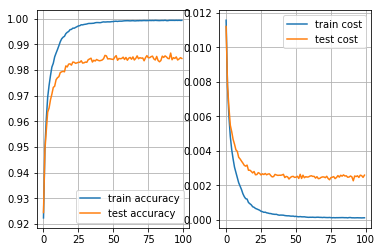

Epoch: 99 Train acc: 0.999 Test acc: 0.984 Train cost: 0.0001 Test cost: 0.0026


In [8]:
# training loop
for e in range(epochs):
    
    iters = int(len(X_train) / batch_size)
    
    for i in range(iters):
        # get random batch
        idx = np.random.choice(len(X_train), batch_size)
        X_batch = X_train[idx,:]
        y_batch = y_train[idx,:]

        # make train step
        sess.run(optimizer, {x: X_batch, y: y_batch, do_kp: dropout_keep_prob})
    
    # evaluate model
    accuracy_train, cost_train = sess.run([accuracy, cost], 
                                          {x: X_train, y: y_train, do_kp: 1.0})
    accuracy_test, cost_test = sess.run([accuracy, cost], 
                                        {x: X_test, y: y_test, do_kp: 1.0})
    results[0].append(accuracy_train)
    results[1].append(cost_train)
    results[2].append(accuracy_test)
    results[3].append(cost_test)
    
    # plot and print results
    plt.subplot(1, 2, 1)
    plt.plot(results[0])
    plt.plot(results[2])
    plt.grid()
    plt.legend(['train accuracy', 'test accuracy'])
    
    plt.subplot(1, 2, 2)
    plt.plot(results[1])
    plt.plot(results[3])  
    plt.grid()
    plt.legend(['train cost', 'test cost'])
    
    display.clear_output(wait=True)
    plt.show()         

    print('Epoch:', e, 
          'Train acc:', np.round(accuracy_train, 3), 
          'Test acc:', np.round(accuracy_test, 3), 
          'Train cost:', np.round(cost_train, 4), 
          'Test cost:', np.round(cost_test, 4))                 
